In [2]:
import pandas as pd

# Load Excel file
df = pd.read_excel("Online Retail.xlsx")

# Convert to CSV
df.to_csv("Online Retail.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Online Retail.csv")

# Display basic information
print(df.info())

# Show the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED 

In [4]:
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
print(df.duplicated().sum())


5268


In [6]:
df = df.drop_duplicates()


In [8]:
 df = df.fillna(df.select_dtypes(include=['number']).mean())



In [9]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-9-f01ffbd33229>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features, adjust column names if necessary
# Check your actual column names and replace below if needed
# The original column names were incorrect.
# They have been replaced with the actual column names from the dataset.
features = df[['CustomerID', 'Quantity']]  # Updated column names

# Normalize the data (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Check data
print(features_scaled.head())

   CustomerID  Quantity
0    1.732479 -0.016520
1    1.732479 -0.016520
2    1.732479 -0.007393
3    1.732479 -0.016520
4    1.732479 -0.016520


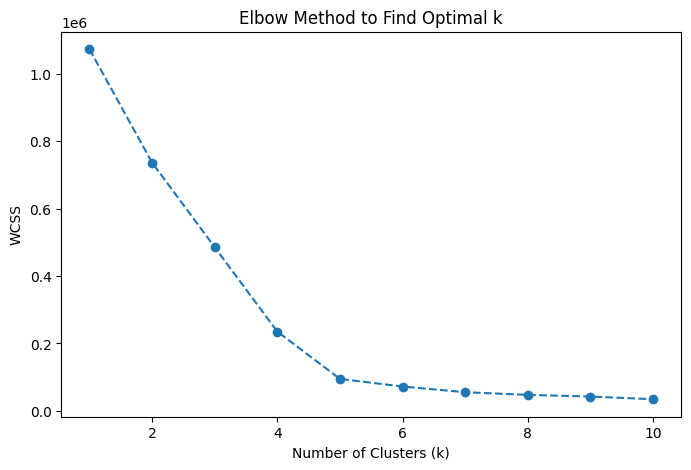

In [14]:
from sklearn.cluster import KMeans
import numpy as np

# Calculate Within-Cluster Sum of Squares (WCSS) for different k values
wcss = []
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal k')
plt.show()


In [16]:
# Set the optimal number of clusters (replace k with your chosen value)
optimal_k = 4  # Change this based on the elbow method result

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# View the cluster assignments using actual column names from your dataset
print(df[['CustomerID', 'Quantity', 'Cluster']].head())


   CustomerID  Quantity  Cluster
0     17850.0         6        1
1     17850.0         6        1
2     17850.0         8        1
3     17850.0         6        1
4     17850.0         6        1


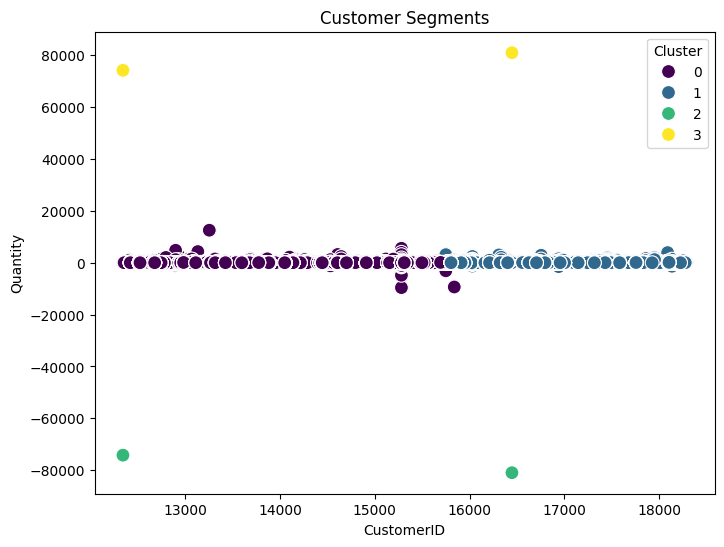

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'CustomerID' and 'Quantity' are the relevant features for your analysis
# If you have other features you want to use for segmentation, replace them here
x_feature = 'CustomerID'
y_feature = 'Quantity'

plt.figure(figsize=(8, 6))
# Use the existing features for the scatterplot
sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel(x_feature)  # Update x-axis label
plt.ylabel(y_feature)  # Update y-axis label
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()


In [21]:
# Get cluster means to understand group behavior
# Only include numeric columns in the mean calculation
cluster_summary = df.groupby('Cluster').agg({col: 'mean' for col in df.select_dtypes(include=['number']).columns})
print(cluster_summary)

             Quantity  UnitPrice    CustomerID  Cluster
Cluster                                                
0            8.693226   5.271835  14513.013877      0.0
1           11.786230   3.138955  17076.361432      1.0
2       -77605.000000   1.560000  14396.000000      2.0
3        77605.000000   1.560000  14396.000000      3.0


In [22]:
df.to_csv("Online Retail.csv", index=False)
print("Segmented customer data saved successfully!")


Segmented customer data saved successfully!
